In [1]:
# import libraries
from IPython.display import Image, display
import numpy as np
import os
from os.path import join
from PIL import ImageFile
import pandas as pd
from matplotlib import cm
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.mixture import GaussianMixture
from sklearn.isotonic import IsotonicRegression
import re
#from resizeimage import resizeimage

import pickle
ImageFile.LOAD_TRUNCATED_IMAGES = True

import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk, filedialog

#import cv2
#import pytesseract
#import numpy as np

import glob
import cv2
import time
import pytesseract
plt.style.use('fivethirtyeight')
%matplotlib inline

Using TensorFlow backend.


In [2]:
try:
    from PIL import Image
except ImportError:
    import Image
    

In [3]:
class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self):
        super(SelectFilesButton, self).__init__()
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.

        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button 
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Tafiditra ny sary."
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"

In [4]:
my_button = SelectFilesButton()  
my_button # This will display the button in the context of Jupyter Notebook

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [5]:
my_button.files

['/home/manampisoa/Documents/ProjetChristian/STAGE/video/REVISION/activite/testdata/DEOUPAGE_FRAME_VIDEO/3.jpg']

In [6]:
type(my_button.files)

list

In [7]:
my_button.files[0]

'/home/manampisoa/Documents/ProjetChristian/STAGE/video/REVISION/activite/testdata/DEOUPAGE_FRAME_VIDEO/3.jpg'

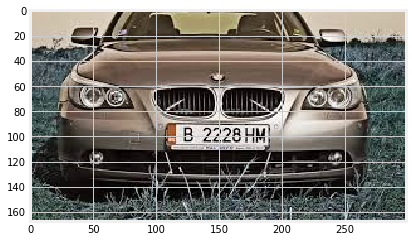

In [8]:
#cv2.imread(my_button.files[0])
plt.imshow(cv2.imread(my_button.files[0]))
plt.show()

In [9]:
#Get rectagle fro mthe origin image
def prepocessing_image(image):
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    gray = cv2.GaussianBlur(gray,(5,5),0)
    gray = cv2.bitwise_not(gray)
    #n,gray_binaire=cv2.threshold(gray,0,255,cv2.THRESH_OTSU +  cv2.THRESH_BINARY_INV)
    edges = cv2.Canny(gray,0,255,apertureSize = 7)
    contours,h =cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    return contours
def image_detecte_plaque(image):
    all_im = []
    pos = []
    kernel = np.ones((5, 5), np.uint8)
    contour=prepocessing_image(image)
    for i,j in enumerate(contour):
        (x,y,w,h)=cv2.boundingRect(j)
        rapport = w/h
        produit = w*h
        if (rapport >=1 and rapport<=5 and produit>300) :
            rr_i = image[y:y+h,x:x+w]
            all_im.append(rr_i)
            pos.append((x,y,w,h))
    return image,all_im,pos 

In [10]:
image = cv2.imread(my_button.files[0])
#GET MULTIPLE RECTANGLE FROM THE VIDEO FRAME
a,b,c = image_detecte_plaque(image)

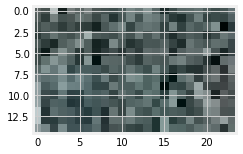

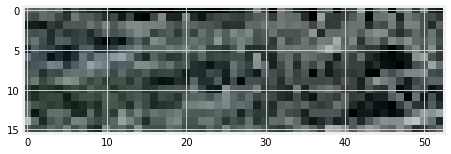

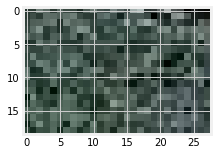

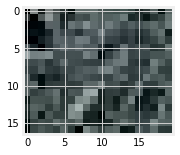

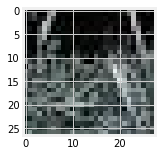

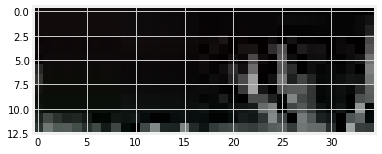

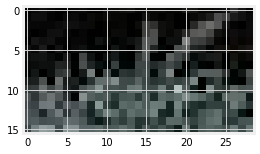

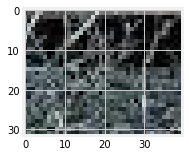

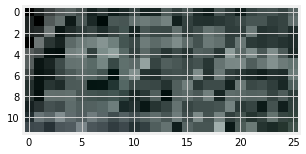

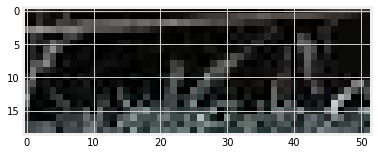

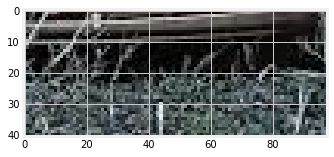

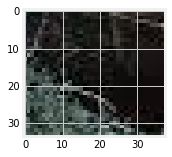

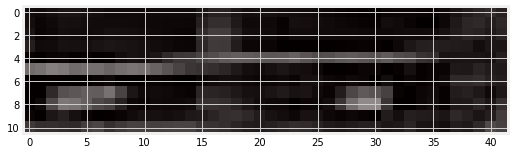

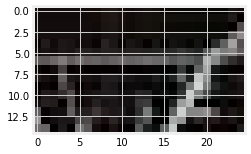

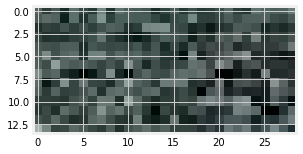

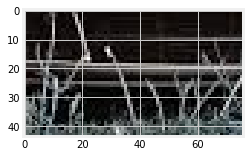

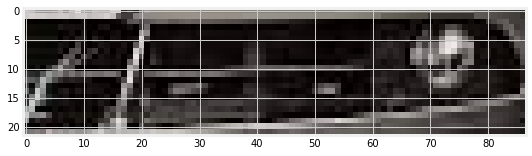

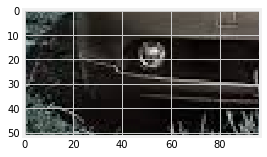

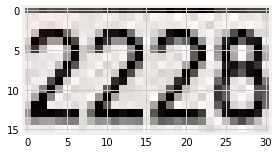

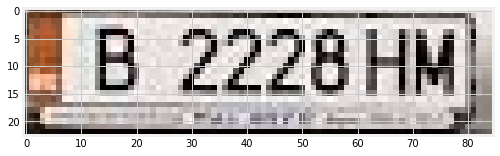

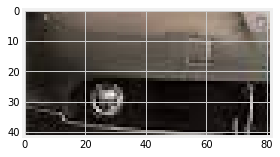

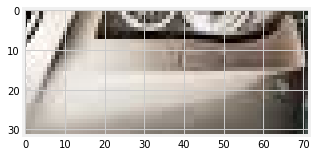

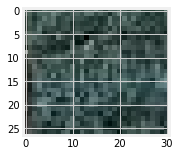

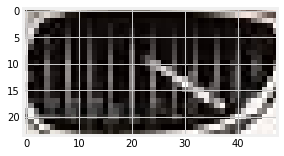

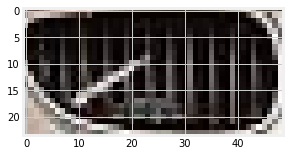

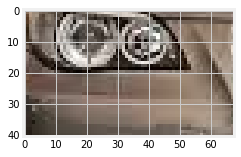

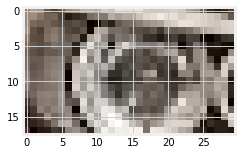

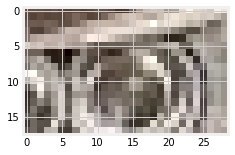

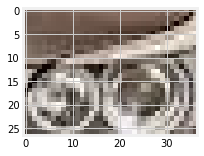

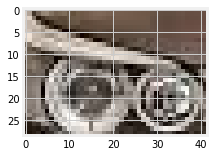

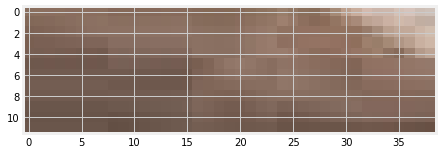

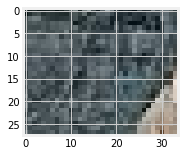

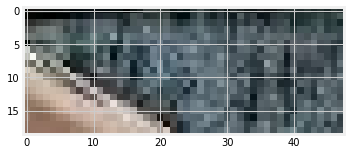

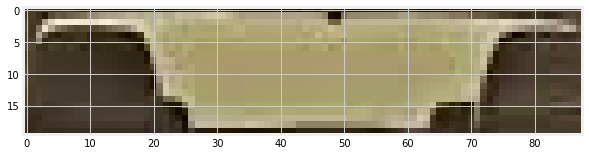

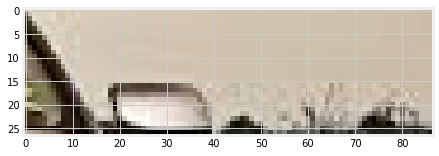

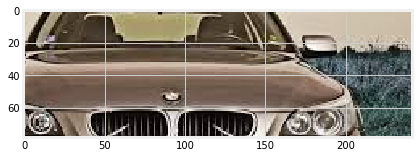

In [11]:
#Visualization des rectanglesnnoté b[i] #VISUALIZE B
 
for i in range(len(b)):
    plt.figure(figsize=(50,50))
    plt.subplot(18,2,i+1)
    plt.imshow(b[i])
    plt.show()


# Loading Modele

In [12]:
#Loading the two modele for classification and filtre rectangle from the original image decopage
with open("Modele/AvecOuSansMotifModele/oc_isol_denoising_avec_ou_sans_motif_sans_pooling.pkl", 'rb') as file:
    if_clf_model_avec_ou_sans_motif = pickle.load(file)
with open("Modele/plaque_ou_pas_avec_denoising/isol_plaque_or_not_denoising.pkl", 'rb') as file:
    if_clf_model_plaque_ou_non = pickle.load(file)

/home/manampisoa/anaconda3/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator ExtraTreeRegressor from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/manampisoa/anaconda3/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator IsolationForest from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


# Resnet Modele Preprocessing

In [13]:
# get features from resnet50 

image_size = 224
resnet_model = ResNet50(input_shape=(image_size, image_size, 3), weights='imagenet', include_top=False)  # Since top layer is the fc layer used for predictions

#X_train1 = resnet_model.predict(X_train)
#X_test1 = resnet_model.predict(X_test)
 

# Denoising process to resnet image_input 

In [14]:
def denoising(liste):
    dst_vide=[]
    #img_height, img_width = 224,224
    #img = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    #img = [resizeimage.resize_crop(img[i], (224, 224)) for i in range(len(img_paths))]
    #img = np.array(imgs)
    #img = [cv2.imread(img_paths[i]) for i in range(len(img_paths))]
    #img = [cv2.resize(img[i], (224,224)) for i in range(len(img_paths))]
    
    
    #rgb_vide=[]
    for x in liste:
        x = cv2.resize(x, (224,224)) 
        
        b,g,r = cv2.split(x)           # get b,g,r
        #sary = cv2.cvtColor(img[11], cv2.COLOR_BGR2RGB)
        rgb_img = cv2.merge([r,g,b])     # switch it to rgb
        #rgb_vide.append(rgb_img)

        # Denoising
        dst = cv2.fastNlMeansDenoisingColored(x,None,10,10,7,21)

        b,g,r = cv2.split(dst)           # get b,g,r
        rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
        dst_vide.append(rgb_dst)
        img_data = np.array(dst_vide)
    return img_data

In [15]:
img = denoising(b) 

In [16]:
img.shape

(36, 224, 224, 3)

Shape(nb_rectangle, 224, 224, 3)

# Features extractions avec Resnet

In [17]:
features_des_rectangles = resnet_model.predict(img)

In [18]:
features_des_rectangles.shape

(36, 7, 7, 2048)

Aprèes Resnet, on obtient un entré de forme(nb_rectangle, 7, 7, 2048)? 2048 sortie Resnet

In [19]:
features_des_rectangles = features_des_rectangles.reshape(features_des_rectangles.shape[0], features_des_rectangles.shape[1]*features_des_rectangles.shape[2]*features_des_rectangles.shape[3])

Reprendre la forme de deux dimension avec de predire par le modele, premiere filtre avec ou sans motif de l'image

In [20]:
features_des_rectangles.shape

(36, 100352)

# Prediction v1

In [22]:
predicted_filtrev1 = if_clf_model_avec_ou_sans_motif.predict(features_des_rectangles) 

In [23]:
predicted_filtrev1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

On reprend les rectangles avec prediction qui vale -1, ce sont des rectangle avec motif, donc intérressant de les étudiés puisqu'ils sont avec motifs.

# On reprend les prediction qui valent -1

In [24]:
#Convertir en array tp avoid error of type TypeError: only integer scalar arrays can be converted to a scalar index

b = np.array(b)

In [25]:
b1 = b[predicted_filtrev1==-1] 

Ces b1 ne sont donc pas encore debruité,puisqu'ils prennnet les images b qui ont des prediction -1, donc on passe encore par le processus de denoising

In [26]:
img1 = denoising(b1)

In [27]:
img1.shape

(36, 224, 224, 3)

Ici les rectangles sont tous avec motifs, donc le nombre initiale restent inchangé et on passe par le second filtre immediatemment

# Features extractions des b1

In [28]:
features_des_valeurs_predites_v1 = resnet_model.predict(img1)

In [29]:
features_des_valeurs_predites_v1.shape

(36, 7, 7, 2048)

In [30]:
#La premiere valeur ne changent ici car les b[i] sont tous avec motifs

In [31]:
#Donc pour passer ces images b1 au second modele, on les reshape à deux dimensions(nb_images,nb_features)

In [32]:
features_des_valeurs_predites_v1 = features_des_valeurs_predites_v1.reshape(features_des_valeurs_predites_v1.shape[0], features_des_valeurs_predites_v1.shape[1]*features_des_valeurs_predites_v1.shape[2]*features_des_valeurs_predites_v1.shape[3])

In [33]:
features_des_valeurs_predites_v1.shape

(36, 100352)

# Prediction v2

In [34]:
predicted_filtrev2 = if_clf_model_plaque_ou_non.predict(features_des_valeurs_predites_v1)

In [35]:
predicted_filtrev2

array([ 1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,
        1, -1])

Donc c'est nous allons compter les valeures prédites par le second filtre, Ici les prédictions 1, sont vraimmment des plaques que l'on souhaite passer par l'ocr après.

In [37]:
np.unique(if_clf_model_plaque_ou_non.predict(features_des_valeurs_predites_v1), return_counts=True)

(array([-1,  1]), array([22, 14]))

On prend les valeures de b1 qui ont des predictions 1, et on passe par l'OCR pour extraire les caractères de la plaque.

In [39]:
b2 = b1[predicted_filtrev2==1]

In [40]:
type(b2)

numpy.ndarray

# PREPROCESSING AVANT OCR

In [41]:
#def preprocess_input(liste):
 #   b2_rgb = [cv2.cvtColor(liste[i], cv2.COLOR_GRAY2RGB) for i in range(len(liste))]
 #   return b2_rgb   

In [43]:
def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [47]:
def increase_brightness_liste(liste, value):
    s = [increase_brightness(liste[i], value) for i in range(len(liste))]
    return s
    

In [48]:
d = increase_brightness_liste(b2, 100)

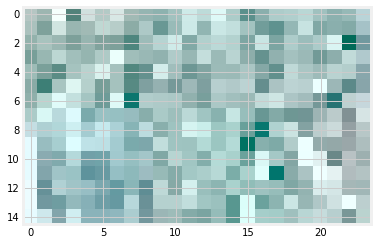

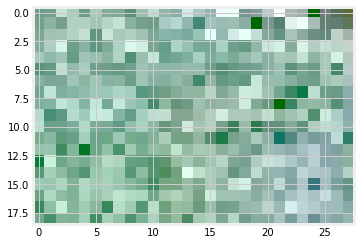

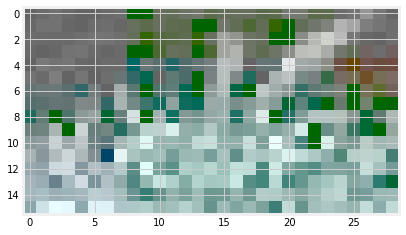

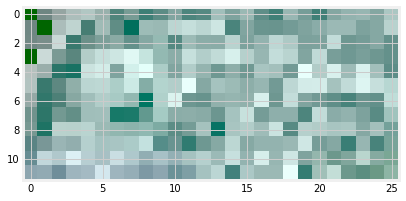

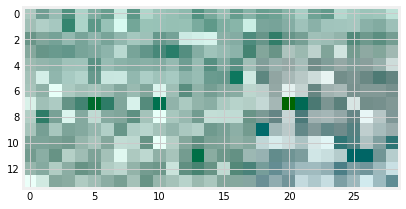

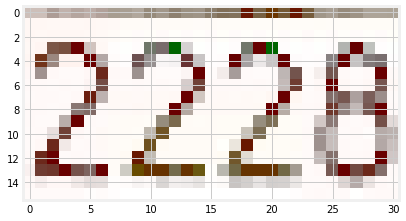

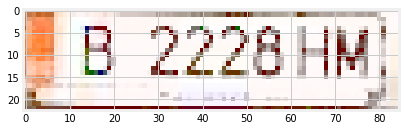

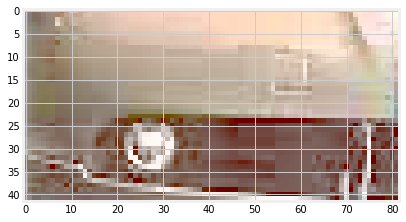

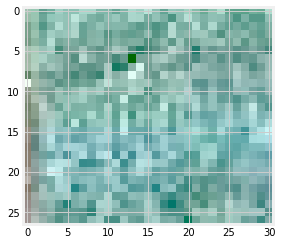

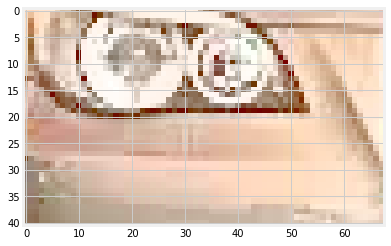

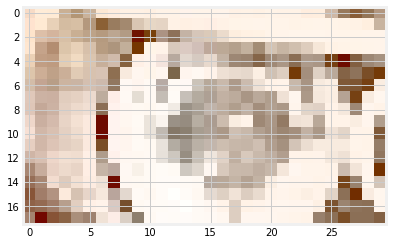

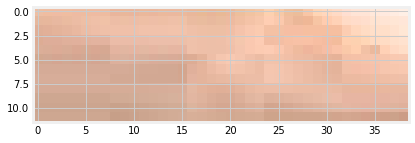

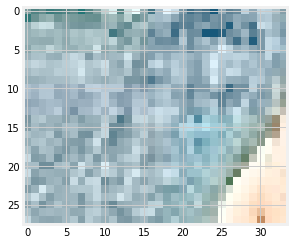

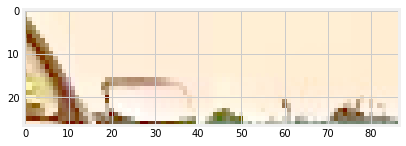

In [50]:
for i in range(len(b2)):
    plt.imshow(d[i])
    plt.show()

In [51]:
def ocr_core(filename):
    """
    This function handle the core OCR processing image
    """
    text = [pytesseract.image_to_string(
     filename[i], config=("-c tessedit"
                  "_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
                  " --psm 11"
                  "--oem 3"
                                   
                  " -l osd"
                  "--dpi 900"
                  " ")) for i in range(len(filename))]
    #text = pytesseract.image_to_string(Image.open(filename),config = r'--l fra --oem 3 --psm 2 --dpi 500') # Configuration ocr )
    # We'll use Pillow's Image class to open the image and pytesseract to detect the string in the image
    return text 

In [52]:
ocr_core(d)

['', '', '', '', '', '2225', 'QB 2226104', '', '', '', '', '', '', '']